By: Lucas Liew of AlgoTrading101 <br>
Guide: https://algotrading101.com/learn/sentiment-analysis-with-python-finance/

In [1]:
import pandas as pd

# If txt/csv file is in the same folder as this notebook
df1 = pd.read_csv("tesla-headlines-sa.csv", encoding='windows-1250', header=None)
df1.columns = ['Title', 'Date']
df1

,Title,Date
0,"Tesla: Nothing Matters, Until Everything Matters","Montana Skeptic•Yesterday, 1:56 PM•600 Comments"
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments"
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments"
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments"
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments"
...,...,...
1150,Will GM Beat Tesla To Market For An Electric P...,"Anton Wahlman•Jan. 15, 2018•460 Comments"
1151,"Energy Storage Can Drive Future Tesla Growth, ...","Nick Cox•Jan. 15, 2018•466 Comments"
1152,Tesla: Cash Is King,"ValueAnalyst•Jan. 15, 2018•738 Comments"
1153,Tesla Bears Hang On,"ValueAnalyst•Jan. 11, 2018•483 Comments"


In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


True

In [2]:
df1['Date'][0] = 'Dec. 9'
df1.head()

,Title,Date
0,"Tesla: Nothing Matters, Until Everything Matters",Dec. 9
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments"
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments"
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments"
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments"


In [3]:
from datetime import datetime
import re

newDateList = [] # create a list to store the cleaned dates

for dateOfArticles in df1['Date']: # loop every row in the "Date" column
    match = re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|May\s\d{1,2}\,\s\d{4}|\w{3}\.\s\d{1,2}|May\s\d{1,2}', 
                      dateOfArticles)

    if re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|\w{3}\s\d{1,2}\,\s\d{4}',match[0]):
        fulldate = match[0] # don't append year to string
    else:
        fulldate = match[0] + ", 2019" # append year to string
    
    for fmt in ('%b. %d, %Y', '%b %d, %Y'):
        try:
            newDate = datetime.strptime(fulldate, fmt).date()
            break # if format is correct, don't test any other formats
        except ValueError:
            pass
        
    newDateList.append(newDate) # add new date to the list

if(len(newDateList) != df1.shape[0]):
    print("Error: Rows don't match")
else:
    df1['New Date'] = newDateList # add the list to our original dataframe

df1

,Title,Date,New Date
0,"Tesla: Nothing Matters, Until Everything Matters",Dec. 9,2019-12-09
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments",2019-12-06
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments",2019-12-04
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments",2019-12-03
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments",2019-12-03
...,...,...,...
1150,Will GM Beat Tesla To Market For An Electric P...,"Anton Wahlman•Jan. 15, 2018•460 Comments",2018-01-15
1151,"Energy Storage Can Drive Future Tesla Growth, ...","Nick Cox•Jan. 15, 2018•466 Comments",2018-01-15
1152,Tesla: Cash Is King,"ValueAnalyst•Jan. 15, 2018•738 Comments",2018-01-15
1153,Tesla Bears Hang On,"ValueAnalyst•Jan. 11, 2018•483 Comments",2018-01-11


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for headline in df1['Title']:
    pol_score = sia.polarity_scores(headline)
    pol_score['headline'] = headline
    results.append(pol_score)

results

[{'neg': 0.349,
  'neu': 0.651,
  'pos': 0.0,
  'compound': -0.0382,
  'headline': 'Tesla: Nothing Matters, Until Everything Matters'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla: The Hype Does Not Reflect Reality'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla Will Likely Achieve Record Deliveries In Q4 Despite Headwinds'},
 {'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286,
  'compound': 0.25,
  'headline': 'Tesla: Automatic Labeling For Computer Vision'},
 {'neg': 0.0,
  'neu': 0.706,
  'pos': 0.294,
  'compound': 0.3612,
  'headline': 'Tesla: Ready To Re-Enter The Fast Lane'},
 {'neg': 0.398,
  'neu': 0.602,
  'pos': 0.0,
  'compound': -0.5106,
  'headline': "Tesla's Cybertruck Is Far From A Failure"},
 {'neg': 0.464,
  'neu': 0.536,
  'pos': 0.0,
  'compound': -0.3818,
  'headline': 'Tesla Cybertruck Peak Craziness'},
 {'neg': 0.31,
  'neu': 0.69,
  'pos': 0.0,
  'compound': -0.4019,
  'headline': "Here's The Re

In [9]:
df1['Score'] = pd.DataFrame(results)['compound']

In [10]:
df2 = df1.groupby(['New Date']).sum() # creates a daily score by summing the scores of the individual articles in each day

In [13]:
# Make sure csv file is in the same folder as this notebook
dfEodPrice = pd.read_csv("tsla-eod-prices.csv")
dfEodPrice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-10,332.200012,337.000000,330.000000,334.799988,334.799988,4309900
1,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500
2,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100
3,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300
4,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500


In [14]:
dfEodPrice['Date'] = dfEodPrice['Date'].astype('datetime64[ns]') 
type(dfEodPrice['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
dfEodPrice2 = dfEodPrice.drop(['Open', 'High','Low','Close','Volume'], axis=1) # drop unwanted rows
dfEodPrice2.set_index('Date', inplace=True) # set Date coloumn as index

In [16]:
dfEodPrice2['Returns'] = dfEodPrice2['Adj Close']/dfEodPrice2['Adj Close'].shift(1) - 1 # calculate daily returns

In [17]:
df2['Score(1)'] = df2.shift(1)

In [18]:
dfReturnsScore = pd.merge(dfEodPrice2[['Returns']], df2[['Score(1)']], 
                       left_index=True, right_index=True, how='left')
dfReturnsScore

,Returns,Score(1)
Date,,
2018-01-10,NaN,NaN
2018-01-11,0.009409,NaN
2018-01-12,-0.005119,NaN
2018-01-16,0.011421,0.5719
2018-01-17,0.020879,-0.1027
...,...,...
2019-12-02,0.014942,-0.3818
2019-12-03,0.003972,-0.5106
2019-12-04,-0.009429,0.6112


In [19]:
dfReturnsScore.fillna(0, inplace=True) 
# replace NaN with 0 permanently

dfReturnsScore

,Returns,Score(1)
Date,,
2018-01-10,0.000000,0.0000
2018-01-11,0.009409,0.0000
2018-01-12,-0.005119,0.0000
2018-01-16,0.011421,0.5719
2018-01-17,0.020879,-0.1027
...,...,...
2019-12-02,0.014942,-0.3818
2019-12-03,0.003972,-0.5106
2019-12-04,-0.009429,0.6112


<AxesSubplot:xlabel='Score(1)'>

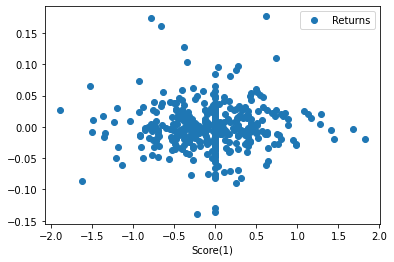

In [20]:
dfReturnsScore.plot(x="Score(1)", y="Returns", style="o")

In [21]:
dfReturnsScore2 = dfReturnsScore[(dfReturnsScore['Score(1)'] > 0.5) | 
                                 (dfReturnsScore['Score(1)'] < -0.5)]

In [22]:
dfReturnsScore2

,Returns,Score(1)
Date,,
2018-01-16,0.011421,0.5719
2018-01-26,0.015431,-0.5277
2018-02-02,-0.015748,-1.3591
2018-02-08,-0.086290,-1.6275
2018-02-09,-0.015259,-0.9171
...,...,...
2019-11-12,0.014025,1.1645
2019-11-22,-0.061410,0.6124
2019-11-25,0.009909,-0.7269


<AxesSubplot:xlabel='Score(1)'>

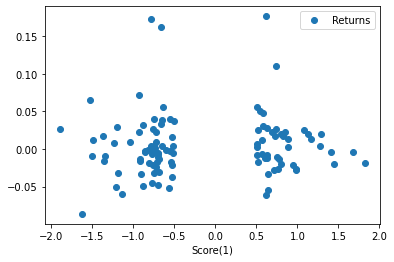

In [23]:
dfReturnsScore2.plot(x="Score(1)", y="Returns", style="o")

In [24]:
dfReturnsScore2['Returns'].corr(dfReturnsScore2['Score(1)'])

0.044623813315777694